In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set(style='white', rc={'figure.figsize':(12,8)})

import os
import requests

import umap
import MulticoreTSNE
import fitsne
import LargeVis
import sklearn.manifold

First we'll get the data from UCI.

In [2]:
if not os.path.exists('shuttle.trn'):
    results = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.trn.Z')
    with open('shuttle.trn.Z', 'wb') as train:
        train.write(results.content)
    !uncompress shuttle.trn.Z
    results = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst')
    with open('shuttle.tst', 'wb') as test:
        test.write(results.content)

Now we load up the shuttle data and combine train and test into a single dataset (and remove the final column which is the label data).

In [3]:
shuttle_train = np.loadtxt('shuttle.trn')
shuttle_test = np.loadtxt('shuttle.tst')
shuttle = np.vstack([shuttle_train, shuttle_test])
data = shuttle[:,:-1]
target = shuttle[:,-1]
data.shape

(58000, 9)

In [4]:
%%time
embedding = umap.UMAP(n_neighbors=10, random_state=42).fit_transform(data)

/Users/leland/anaconda3/envs/umap_dev/lib/python3.5/site-packages/umap_learn-0.3.2-py3.5.egg/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)


CPU times: user 2min 5s, sys: 7.17 s, total: 2min 12s
Wall time: 1min 34s


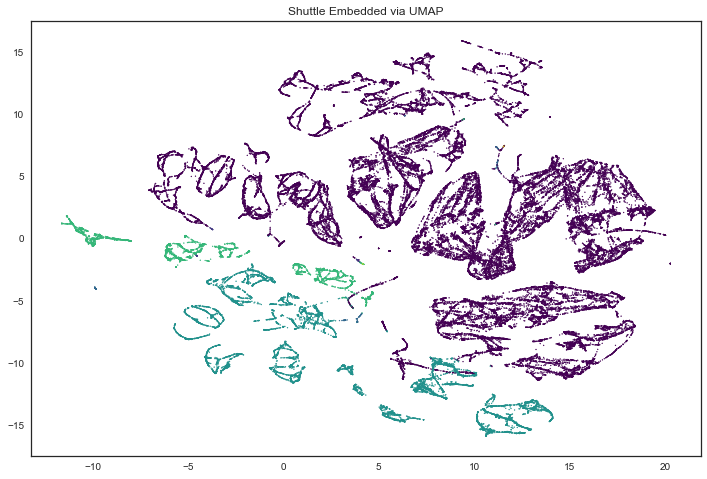

In [5]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="viridis", s=1)
plt.title('Shuttle Embedded via UMAP');

In [6]:
np.save('umap_shuttle.npy', embedding)

In [7]:
import pandas as pd

In [8]:
output = pd.DataFrame(embedding, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_umap.csv')

### T-SNE

In [9]:
fit_tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=1, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 11min 24s, sys: 19.2 s, total: 11min 43s
Wall time: 11min 54s


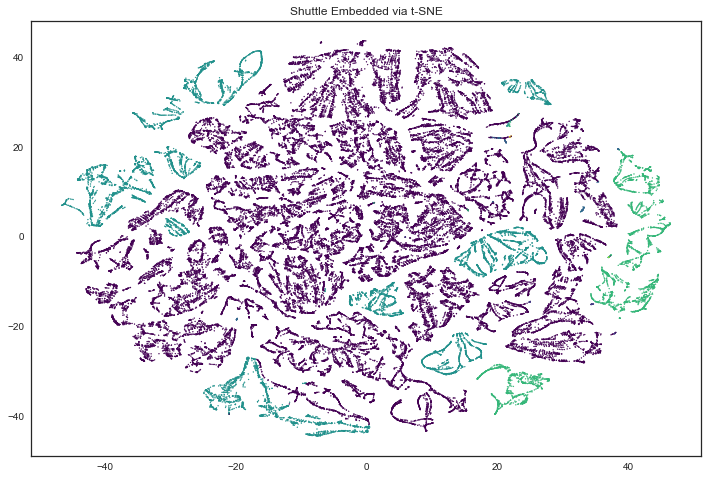

In [10]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=target, cmap="viridis", s=1)
plt.title('Shuttle Embedded via t-SNE');

In [11]:
np.save('tsne_shuttle_embedding.npy', u_tsne)

In [12]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_tsne.csv')

## FIt-SNE

In [13]:
%time u_fitsne = fitsne.FItSNE(data.astype(np.double), nthreads=1, rand_seed=42)

CPU times: user 1min 40s, sys: 7.2 s, total: 1min 48s
Wall time: 1min 48s


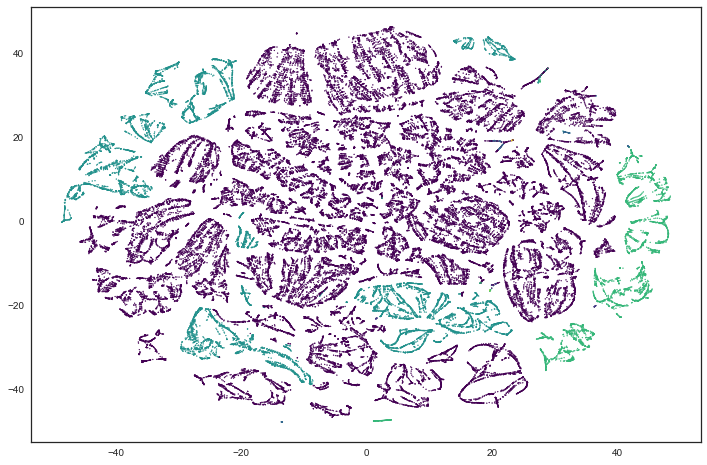

In [14]:
plt.scatter(u_fitsne[:,0], u_fitsne[:,1], c=target, cmap="viridis", s=1)

In [15]:
np.save('fitsne_shuttle_embedding1.npy', u_fitsne)

In [16]:
output = pd.DataFrame(u_fitsne, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_fitsne1.csv')

## LargeVis

In [17]:
largevis_data = data.astype(np.float32, order='C')
LargeVis.loadarray(largevis_data)
largevis_n_samples = int(largevis_data.shape[0] / 100.0)

In [18]:
%time u_largevis = LargeVis.run(2, 1, largevis_n_samples)

CPU times: user 10min 12s, sys: 4.47 s, total: 10min 17s
Wall time: 10min 15s


In [19]:
u_largevis = np.array(u_largevis)

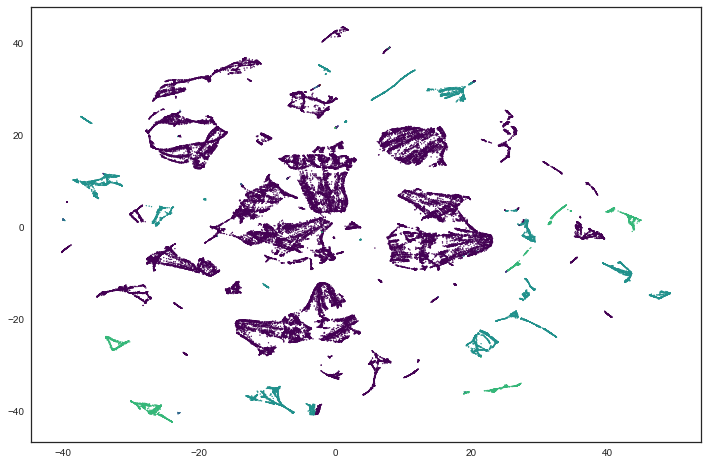

In [20]:
plt.scatter(u_largevis[:,0], u_largevis[:,1], c=target, cmap="viridis", s=1)

In [21]:
np.save('largevis_shuttle_embedding1.npy', u_largevis)

In [22]:
output = pd.DataFrame(u_largevis, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_largevis1.csv')

## Laplacian Eigenmaps

In [23]:
fit_laplacian = sklearn.manifold.SpectralEmbedding(n_neighbors=10)
%time u_laplacian = fit_laplacian.fit_transform(data)

/Users/leland/anaconda3/envs/umap_dev/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 4min 18s, sys: 2.99 s, total: 4min 21s
Wall time: 2min 13s


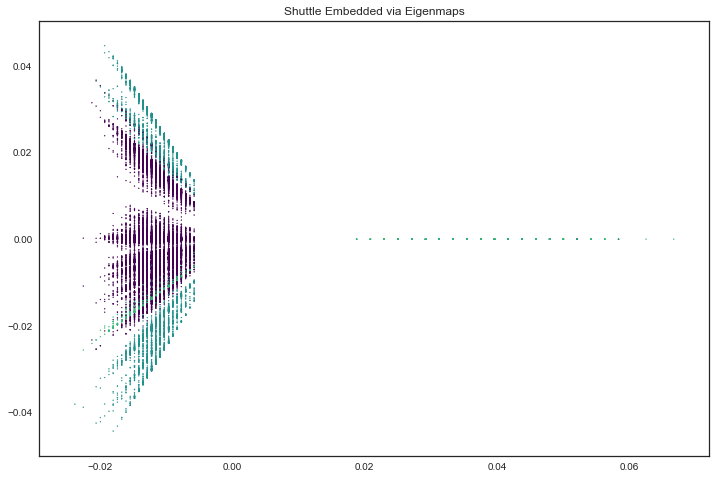

In [24]:
plt.scatter(u_laplacian[:,0], u_laplacian[:,1], c=target, cmap="viridis", s=1)
plt.title('Shuttle Embedded via Eigenmaps');

In [25]:
np.save('eigenmaps_shuttle_embedding.npy', u_laplacian)

In [ ]:
output = pd.DataFrame(u_laplacian, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_eigenmaps.csv')

## Isomap

In [ ]:
fit_isomap = sklearn.manifold.Isomap()
%time u_isomap = fit_isomap.fit_transform(data)

In [ ]:
plt.scatter(u_isomap[:,0], u_isomap[:,1], c=target, cmap="viridis", s=1)
plt.title('Shuttle Embedded via Isomap');

In [ ]:
np.save('isomap_shuttle_embedding.npy', u_isomap)

In [ ]:
output = pd.DataFrame(u_isomap, columns=('x','y'))
output['labels']=target
output.to_csv('embedding_shuttle_isomap.csv')